keras and tensorflow>2.0

In [3]:
#data collection
import pandas_datareader as pdr

In [6]:
df = pdr.get_data_tiingo('AAPL', api_key='10a12bb0b7ff91f08703e35fd3fa01c5d0175caa')

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [7]:
df.to_csv('AAPL.csv')

In [8]:
import pandas as pd 

In [11]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-02-26 00:00:00+00:00  178.97  179.39  176.21  176.35  36886432   
       2018-02-27 00:00:00+00:00  178.39  180.48  178.16  179.10  38685165   
       2018-02-28 00:00:00+00:00  178.12  180.62  178.05  179.26  33604574   
       2018-03-01 00:00:00+00:00  175.00  179.78  172.66  178.54  48801970   
       2018-03-02 00:00:00+00:00  176.21  176.30  172.45  172.80  38453950   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-02-26 00:00:00+00:00  42.596219  42.696182  41.939318  41.972639   
       2018-02-27 00:00:00+00:00  42.458174  42.955610  42.403433  42.627160   
       2018-02-28 00:00:00+00:00  42.393912  42.988931  42.377252  42.665241   
       2018-03-01 00:00:00+00:00  41.651329  42.789005  41.094391  42.493876   
       2018-03-02 00:00:00+00:00  41.939318  41.960739  41.044409  41.127712   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-02-26 00:00:00+00:00  147545728      0.0          1.0  
       2018-02-27 00:00:00+00:00  154740660      0.0          1.0  
       2018-02-28 00:00:00+00:00  134418296      0.0          1.0  
       2018-03-01 00:00:00+00:00  195207880      0.0          1.0  
       2018-03-02 00:00:00+00:00  153815800      0.0          1.0

In [12]:
df.tail()

close    high       low    open    volume  \
symbol date                                                                    
AAPL   2023-02-17 00:00:00+00:00  152.55  153.00  150.8500  152.35  59144118   
       2023-02-21 00:00:00+00:00  148.48  151.30  148.4050  150.20  58867230   
       2023-02-22 00:00:00+00:00  148.91  149.95  147.1600  148.87  51011305   
       2023-02-23 00:00:00+00:00  149.40  150.34  147.2400  150.09  48394249   
       2023-02-24 00:00:00+00:00  146.71  147.19  145.7202  147.11  55469606   

                                  adjClose  adjHigh    adjLow  adjOpen  \
symbol date                                                              
AAPL   2023-02-17 00:00:00+00:00    152.55   153.00  150.8500   152.35   
       2023-02-21 00:00:00+00:00    148.48   151.30  148.4050   150.20   
       2023-02-22 00:00:00+00:00    148.91   149.95  147.1600   148.87   
       2023-02-23 00:00:00+00:00    149.40   150.34  147.2400   150.09   
       2023-02-24 00:00:00+00:00    146.71   147.19  145.7202   147.11   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-02-17 00:00:00+00:00   59144118      0.0          1.0  
       2023-02-21 00:00:00+00:00   58867230      0.0          1.0  
       2023-02-22 00:00:00+00:00   51011305      0.0          1.0  
       2023-02-23 00:00:00+00:00   48394249      0.0          1.0  
       2023-02-24 00:00:00+00:00   55469606      0.0          1.0

In [13]:
df2=df.reset_index()['close']

In [14]:
df2[1228:]

1228    133.49
1229    133.41
1230    134.76
1231    135.94
1232    135.21
1233    135.27
1234    137.87
1235    141.11
1236    142.53
1237    141.86
1238    143.96
1239    145.93
1240    143.00
1241    144.29
1242    145.43
1243    150.82
1244    154.50
1245    151.73
1246    154.65
1247    151.92
1248    150.87
1249    151.01
1250    153.85
1251    153.20
1252    155.33
1253    153.71
1254    152.55
1255    148.48
1256    148.91
1257    149.40
1258    146.71
Name: close, dtype: float64

In [15]:
df1=df.reset_index()['close']

In [16]:
df1.shape

(1259,)

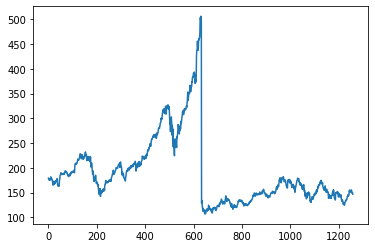

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
#LSTM are sensitive to the scale of the data, so we apply MinMax scaler
import numpy as np

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1.shape

(1259, 1)

In [21]:
df1

array([[0.18066374],
       [0.17921102],
       [0.17853475],
       ...,
       [0.10537257],
       [0.10659987],
       [0.09986224]])

In [22]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [23]:
training_size,test_size

(818, 441)

In [24]:
len(train_data) , len(test_data)

(818, 441)

In [27]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]  #i=0, 0,1,2,3
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)


In [28]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
print(X_train)

[[0.18066374 0.17921102 0.17853475 ... 0.21056982 0.21192235 0.20929242]
 [0.17921102 0.17853475 0.1707201  ... 0.21192235 0.20929242 0.21299937]
 [0.17853475 0.1707201  0.17375078 ... 0.20929242 0.21299937 0.21189731]
 ...
 [0.06294302 0.07476518 0.07020664 ... 0.04866625 0.04510958 0.04470883]
 [0.07476518 0.07020664 0.06732624 ... 0.04510958 0.04470883 0.05127113]
 [0.07020664 0.06732624 0.0647464  ... 0.04470883 0.05127113 0.0465623 ]]


In [30]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [31]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [32]:
#reshape input to be [samples, time steps, features] which is required in LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] ,1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [34]:
#create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
mode1=Sequential()
mode1.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
mode1.add(LSTM(50,return_sequences=True))
mode1.add(LSTM(50))
mode1.add(Dense(1))
mode1.compile(loss='mean_squared_error',optimizer='adam')


In [37]:
mode1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
X_train[:100]

array([[[0.18066374],
        [0.17921102],
        [0.17853475],
        ...,
        [0.21056982],
        [0.21192235],
        [0.20929242]],

       [[0.17921102],
        [0.17853475],
        [0.1707201 ],
        ...,
        [0.21192235],
        [0.20929242],
        [0.21299937]],

       [[0.17853475],
        [0.1707201 ],
        [0.17375078],
        ...,
        [0.20929242],
        [0.21299937],
        [0.21189731]],

       ...,

       [[0.21056982],
        [0.21192235],
        [0.20929242],
        ...,
        [0.17968691],
        [0.19531622],
        [0.17495304]],

       [[0.21192235],
        [0.20929242],
        [0.21299937],
        ...,
        [0.19531622],
        [0.17495304],
        [0.17001879]],

       [[0.20929242],
        [0.21299937],
        [0.21189731],
        ...,
        [0.17495304],
        [0.17001879],
        [0.15441453]]])

In [39]:
mode1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 382ms/step - loss: 0.0382 - val_loss: 0.0015
Epoch 2/100
12/12 [==============================] - 4s 339ms/step - loss: 0.0145 - val_loss: 0.0036
Epoch 3/100
12/12 [==============================] - 3s 224ms/step - loss: 0.0110 - val_loss: 4.4419e-04
Epoch 4/100
12/12 [==============================] - 3s 252ms/step - loss: 0.0095 - val_loss: 5.6511e-04
Epoch 5/100
12/12 [==============================] - 3s 227ms/step - loss: 0.0089 - val_loss: 0.0017
Epoch 6/100
12/12 [==============================] - 4s 317ms/step - loss: 0.0082 - val_loss: 0.0021
Epoch 7/100
12/12 [==============================] - 3s 264ms/step - loss: 0.0079 - val_loss: 3.9459e-04
Epoch 8/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0060 - val_loss: 3.0630e-04
Epoch 9/100
12/12 [==============================] - 3s 227ms/step - loss: 0.0057 - val_loss: 3.8904e-04
Epoch 10/100
12/12 [==============================] - 3s 278ms/step - 

In [40]:
import tensorflow as tf

In [42]:
tf.__version__

'2.11.0'

In [43]:
from re import X
#prediction and check performance
train_predict=mode1.predict(X_train)
test_predict=mode1.predict(X_test)

11/11 [==============================] - 1s 54ms/step


In [44]:
#transformback
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [46]:
#calculate RMSE
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

234.03857835051537

In [47]:
#test data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

161.43761519288262

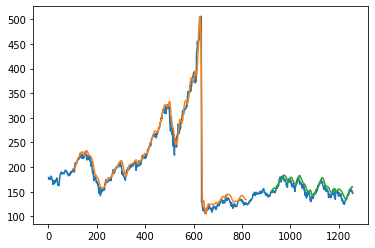

In [48]:
#plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [49]:
len(test_data)

441

In [50]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [51]:
x_input.shape

(1, 100)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
temp_input

[0.08919223544145266,
 0.09833437695679392,
 0.09908578584846583,
 0.09665623043206006,
 0.08328115216030052,
 0.08410770194113959,
 0.08050093926111451,
 0.07889793362554787,
 0.09054477144646211,
 0.07899812147777074,
 0.08909204758922978,
 0.0924483406386975,
 0.09272385723231058,
 0.09154664996869122,
 0.1012648716343143,
 0.10672510958046327,
 0.11396368190356915,
 0.10647463994990602,
 0.09507827175954914,
 0.1224796493425172,
 0.11646837820914213,
 0.10973074514715087,
 0.0956543519098309,
 0.08025046963055726,
 0.07899812147777074,
 0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825,
 0.10855353788353161,
 0.11078271759549146,
 0.10336881653099561,
 0.09362554790231681,
 0.08598622417031926,
 0.10316844082654975,
 0.10386975579211016,
 0.1026174076393237,
 0.0996618659987476,
 0.090344395742016

In [72]:
#demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x = x_input.reshape((1, n_steps, 1))
    yhat = mode1.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1
print(lst_output)

0 day input [0.09833438 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094
 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386
 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827
 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812
 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461
 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354
 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844 0.10386976
 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587
 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449
 0.06376957 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017
 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698
 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666
 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446
 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654
 0.11937383 0.11243582 0.11974953 0.11291171 0.1102

InvalidArgumentError: ignored